### Some OpenCV functions: A tutorial

#### A. cv2.inRange() and cv2.bitwise_and()

In [1]:
# Importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [2]:
def detect_yellow_and_white(path, yellow):
    """
    This function detects yellow and white colors in images.
    """
    ## Read Image in BGR
    img = cv2.imread(path)
    ## Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ## Mask for white (0, 0, 150) ~ (255, 50, 255)
    mask = cv2.inRange(hsv, (0, 0, 150), (255, 50, 255))
    if yellow:
        ## Mask for yellow (15,0,0) ~ (36, 255, 255)
        mask_yellow = cv2.inRange(hsv, (15,0,0), (36, 255, 255))
        ## Final mask for yellow and white
        mask = cv2.bitwise_or(mask, mask_yellow) 
    return cv2.bitwise_and(img, img, mask=mask)

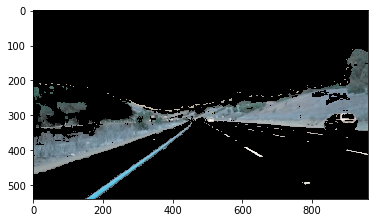

In [3]:
plt.imshow(detect_yellow_and_white("test_images/solidYellowCurve.jpg", True))

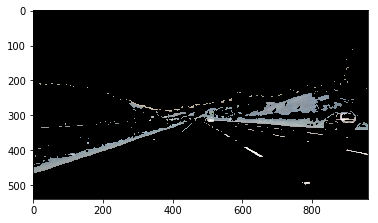

In [4]:
plt.imshow(detect_yellow_and_white("test_images/solidYellowCurve.jpg", False))

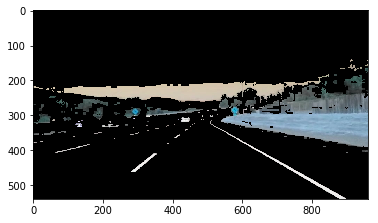

In [5]:
plt.imshow(detect_yellow_and_white("test_images/solidWhiteCurve.jpg", True))

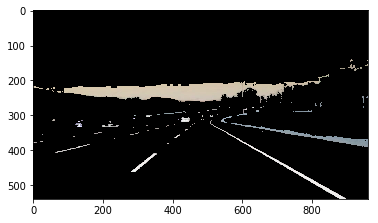

In [6]:
plt.imshow(detect_yellow_and_white("test_images/solidWhiteCurve.jpg", False))

Figure solidWhiteCurve.jpg


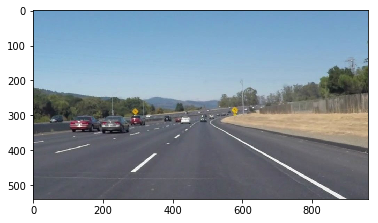

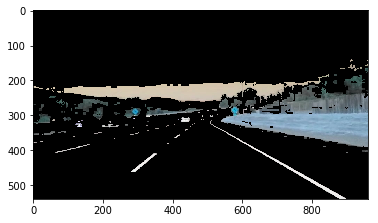

Figure solidWhiteRight.jpg


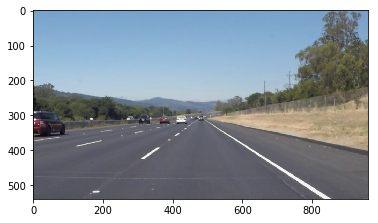

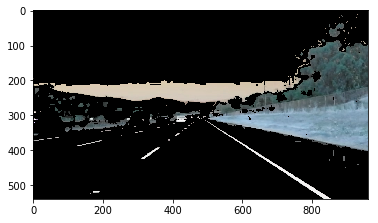

Figure solidYellowCurve2.jpg


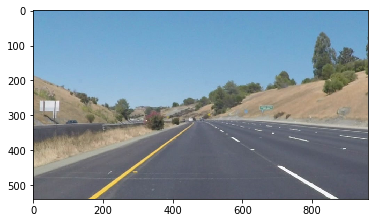

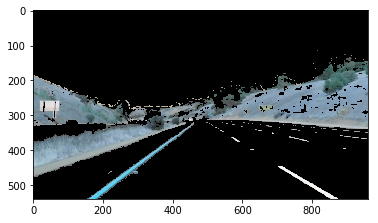

Figure solidYellowLeft.jpg


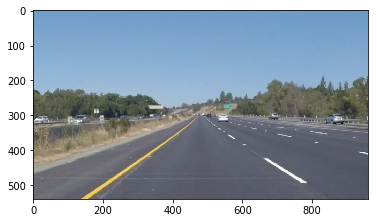

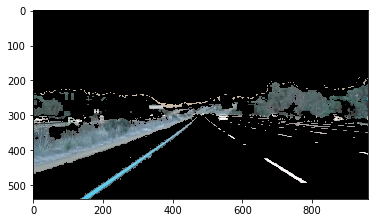

Figure whiteCarLaneSwitch.jpg


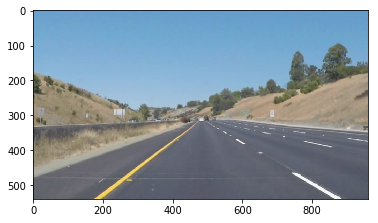

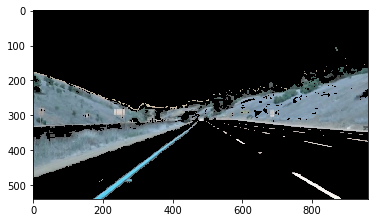

Figure solidYellowCurve.jpg


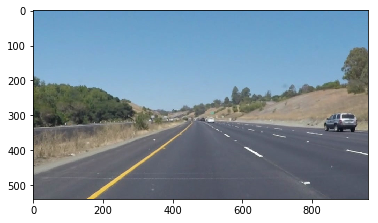

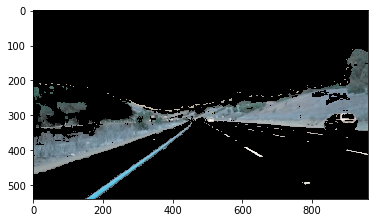

In [7]:
import os
for path in os.listdir("test_images/"):
    print("Figure {}".format(path))
    path = "test_images/" + path
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(detect_yellow_and_white(path, True))
    plt.show()
    

#### B. Drawing on images

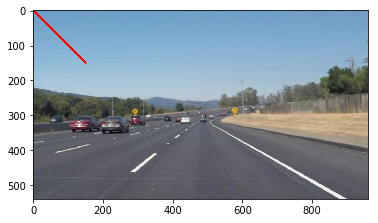

In [8]:
# Read Image
img = cv2.imread('test_images/solidWhiteCurve.jpg', cv2.IMREAD_COLOR)
# Set up line
line_point_0 = (0, 0)
line_point_1 = (150, 150)
line_color = (0, 0, 255)
line_width_in_pixels = 5
# Draw line
cv2.line(img, line_point_0, line_point_1, line_color, line_width_in_pixels) # In place
# Display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

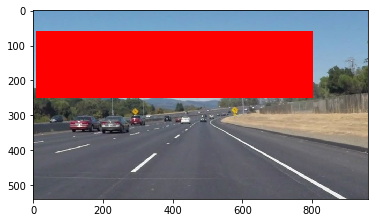

In [9]:
# Read Image
img = cv2.cvtColor(cv2.imread('test_images/solidWhiteCurve.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
# Rectangle figure on image
pts = np.array([[(10, 59), (800, 59), (800, 250), (10, 250)]], np.int32)
# Figure color in rgb
color = (255, 0, 0)
# Plot figure on image
plt.imshow(cv2.fillPoly(img, pts, color))

#### C. Operations on images

Original


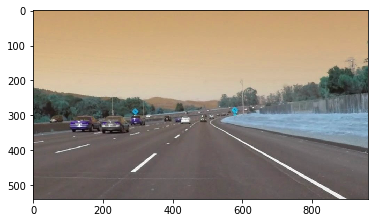

Blended


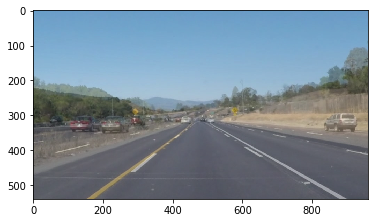

Gray


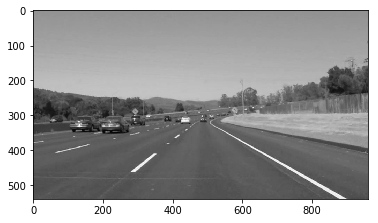

RGB


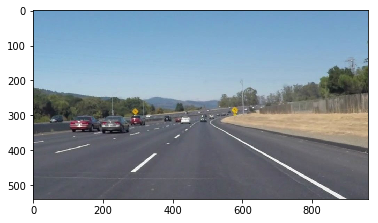

True

In [10]:
# Read Image
img = cv2.imread('test_images/solidWhiteCurve.jpg', cv2.IMREAD_COLOR)
print("Original")
plt.imshow(img)
plt.show()
# overlay two images
print("Blended")
img1 = cv2.imread('test_images/solidWhiteCurve.jpg')
img2 = cv2.imread('test_images/solidYellowCurve.jpg')
blend = cv2.cvtColor(cv2.addWeighted(img1, 0.5, img2, 0.5, 0), cv2.COLOR_BGR2RGB)
plt.imshow(blend)
plt.show()
# To gray color
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Gray")
plt.imshow(gray, cmap='gray')
plt.show()
# To RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("RGB")
plt.imshow(rgb)
plt.show()
# Writing output
path = "blended.jpg"
cv2.imwrite(path, blend)